In [9]:
from pprint import pprint
import sklearn.metrics
import autosklearn.classification
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = '../data/titanic_dirty_data.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Survived'])
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_budget = [30] #, 60, 40, 60, 90, 120]
accuracy = []
precision = []
recall = []
leaderboard = []
config_list = []
for t in time_budget:
    accuracyi = []
    precisioni = []
    recalli = []
    for i in range(2):
        print("Time budget:", t)
        automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=t,
        include = {
            'classifier': ["mlp"],
            'feature_preprocessor': ["no_preprocessing"]
        },
        # delete_tmp_folder_after_terminate=True,
        tmp_folder="tmp/autosklearn_classification_example_tmp"+str(i),
        )

        automl.fit(X_train, y_train, dataset_name="airbnb")

        run_key = list(automl.automl_.runhistory_.data.keys())[0]
        run_value = automl.automl_.runhistory_.data[run_key]
        config=automl.automl_.runhistory_.ids_config[run_key.config_id]
        # print("Config:", config)
        # print("Leaderboard:", automl.leaderboard())
        # config_list.append(str(config))
        # leaderboard.append(str(automl.leaderboard()))

        predictions = automl.predict(X_test)
        print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))
        print("Precision", sklearn.metrics.precision_score(y_test, predictions))
        print("Recall", sklearn.metrics.recall_score(y_test, predictions))
        accuracyi.append(sklearn.metrics.accuracy_score(y_test, predictions))
        precisioni.append(sklearn.metrics.precision_score(y_test, predictions))
        recalli.append(sklearn.metrics.recall_score(y_test, predictions))
    accuracy.append(accuracyi)
    precision.append(precisioni)
    recall.append(recalli)


Time budget: 30


/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Name has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Sex has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Ticket has generic type object. Autosklearn will treat this column as string. Please 

MLPP INITTT


Fitting to the training data:  10%|█         | 3/30 [00:03<00:27,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 382 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 214 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 251 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 467 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 702 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 91 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 08:48:23,041:Client-AutoMLSMBO(1)::airbnb] Configuration 701 not found
[WARNING] [2023-11-29 08:48:23,042:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:  13%|█▎        | 4/30 [00:04<00:26,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 171 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 548 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 499 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 509 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 596 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 640 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 317 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 322 not found
[WARNING] [2023-11-29 08:48:23,062:Client-AutoMLSMBO(1)::airbnb] Configuration 304 not found
[WARNING] [2023-11-29 08:48:23,063:Client-AutoMLSMBO(1)::airbnb] Configuration 643 not found
[WARNING] [2023-11-29 08:48:23,063:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 30/30 [00:22<00:00,  1.35it/s, The total time budget for this task is 0:00:30]


Accuracy score: 0.776
Precision 0.7560975609756098
Recall 0.6326530612244898
Time budget: 30


/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Name has generic type object. Autosklearn will treat

MLPP INITTT


Fitting to the training data:   7%|▋         | 2/30 [00:02<00:28,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 08:48:49,419:Client-AutoMLSMBO(1)::airbnb] Configuration 382 not found
[WARNING] [2023-11-29 08:48:49,419:Client-AutoMLSMBO(1)::airbnb] Configuration 214 not found
[WARNING] [2023-11-29 08:48:49,419:Client-AutoMLSMBO(1)::airbnb] Configuration 251 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 467 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 702 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 91 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configuration 701 not found
[WARNING] [2023-11-29 08:48:49,420:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:  10%|█         | 3/30 [00:03<00:27,  1.01s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 08:48:49,443:Client-AutoMLSMBO(1)::airbnb] Configuration 199 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 171 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 548 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 499 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 509 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 596 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 640 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 317 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 322 not found
[WARNING] [2023-11-29 08:48:49,444:Client-AutoMLSMBO(1)::airbnb] Configuration 304 not found
[WARNING] [2023-11-29 08:48:49,445:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 30/30 [00:21<00:00,  1.42it/s, The total time budget for this task is 0:00:30]


Accuracy score: 0.776
Precision 0.7560975609756098
Recall 0.6326530612244898


/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [10]:
print(accuracy)
print(precision)
print(recall)
print(config_list)
print(leaderboard)

[[0.776, 0.776]]
[[0.7560975609756098, 0.7560975609756098]]
[[0.6326530612244898, 0.6326530612244898]]
[]
[]


Text(0.5, 0, 'Time Budget')

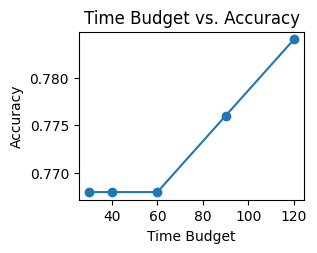

In [7]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, accuracy, marker='o')
plt.title('Time Budget vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

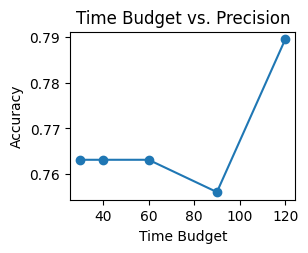

In [8]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, precision, marker='o')
plt.title('Time Budget vs. Precision')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

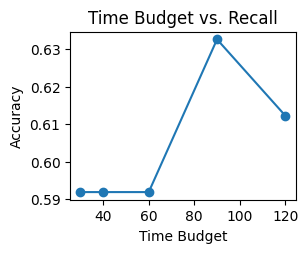

In [9]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, recall, marker='o')
plt.title('Time Budget vs. Recall')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')